In [5]:
import os
import tarfile

In [6]:
from six.moves import urllib


In [7]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [8]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

接下来调用该函数，将数据加载到内存中，


In [9]:
fetch_housing_data()

In [10]:
# 看一下房价数据
housing = load_housing_data()

In [11]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


每行代表一个地区，一共有10个属性值：
longitude, latitude, housing_median_age, total_rooms, total_bed
rooms, population, households, median_income, median_house_value,ocean_proximity.

In [12]:
housing.describe()
# 返回一些数值特征值的统计信息

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


info()：注意total_bedrooms数量并非20640， 意味着有的地区是没有这一项数据的

In [13]:
housing["ocean_proximity"].value_counts()
# value_counts()函数会返回类别特征值的种类以及每一类的数量

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

hist()函数，会画出每一个数值属性值的直方图，横轴为特征值，有bins指定每项的范围，纵轴为数量

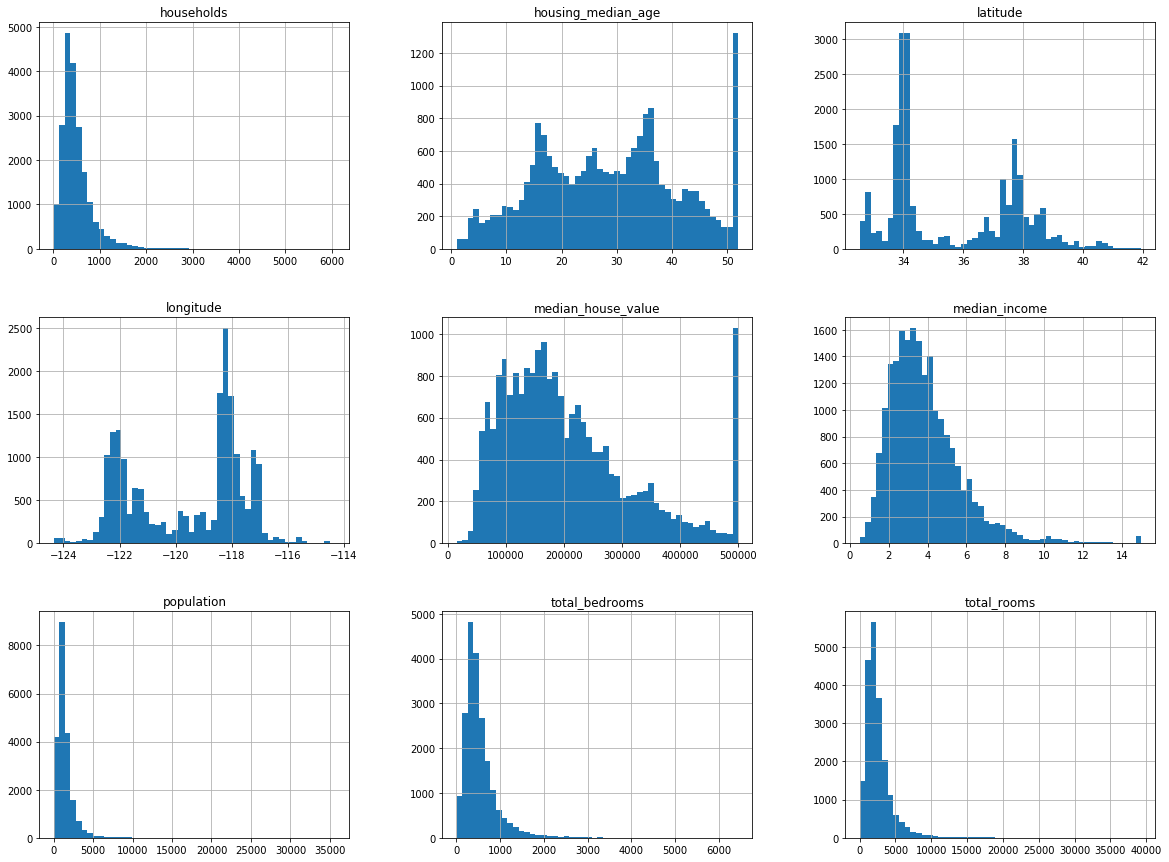

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

创建一个测试集,用来测试模型的准确率，以免过拟合

In [16]:
import numpy as np



In [ ]:
iloc 按行读取

In [18]:

#将数据集中20%作为测试集
def split_train_test(data, test_ratio):
    # 获得全排列的一种情况
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [19]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), 'train+', len(test_set), 'test')

16512 train+ 4128 test


注意，每次重新运行程序，都会生成一个完全不同测试集，当足够次数多后，算法将会利用到全部的训练集，这样将会造成严重的过拟合现象。一个方案是第一次运行程序时，生成一个测试集，而在以后每一次运行时从内存中加载数据集就好了；另一个方案时，在调用`np.random.permutation`之前，设定seed`np.random.seed(42)`这样将产生一样的全排列.
但是当你获取了一个更新过的数据集比如数据集增加，上述两种方法将不再适用。
```python
import numpy as np

np.random.seed(42)
ls = np.random.permutation(10)
ls_2 = np.random.permutation(10)
ls_add = np.random.permutation(14)
print(ls, ls_2, ls_add, sep='\n')

# 三次运行程序的输出：
'''
first：
[8 1 5 0 7 2 9 4 3 6]
[0 1 8 5 3 4 7 9 6 2]

second：
[8 1 5 0 7 2 9 4 3 6]
[0 1 8 5 3 4 7 9 6 2]
third:
当数据增加时：比如14
发现排序已经改变
[8 1 5 0 7 2 9 4 3 6]
[0 1 8 5 3 4 7 9 6 2]
[10  2 11  6  8  9  3  0 13 12  5  7  1  4]
'''
```

一个更通用的方法是，用每个实例的标识符（indentifier）来决定是否称为测试集（假设每个实例都有一个独一无二且不可变的标识符）。比如，可以计算每个实例的哈希值。



series.apply
访问方式


In [27]:
import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
print(len(train_set), 'train+', len(test_set), 'test')

16362 train+ 4278 test


更加稳定的方式，利用纬度和经度，创建哈希值


In [30]:
housing_with_id["id"]= housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")


In [31]:
print(len(train_set), 'train+', len(test_set), 'test')

16267 train+ 4373 test


scikit-learn提供了分割数据集的函数
* train_test_split

In [33]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


In [34]:
print(len(train_set), 'train+', len(test_set), 'test')

16512 train+ 4128 test


In [35]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
print(housing["income_cat"])

0        6.0
1        6.0
2        5.0
3        4.0
4        3.0
5        3.0
6        3.0
7        3.0
8        2.0
9        3.0
10       3.0
11       3.0
12       3.0
13       2.0
14       2.0
15       2.0
16       2.0
17       2.0
18       2.0
19       2.0
20       1.0
21       2.0
22       2.0
23       2.0
24       2.0
25       2.0
26       2.0
27       2.0
28       2.0
29       2.0
        ... 
20610    1.0
20611    1.0
20612    1.0
20613    1.0
20614    2.0
20615    2.0
20616    2.0
20617    3.0
20618    2.0
20619    2.0
20620    4.0
20621    2.0
20622    2.0
20623    2.0
20624    3.0
20625    3.0
20626    2.0
20627    2.0
20628    2.0
20629    2.0
20630    3.0
20631    3.0
20632    3.0
20633    2.0
20634    3.0
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64


In [36]:
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

基于收入来划分训练集和测试集，保证训练集和测试集中各个收入的比重与所有数据中各个收入所占的比重相同

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    start_train_set = housing.loc[train_index]
    start_test_set = housing.loc[test_index]


In [38]:
# 将用于分层的列除去
for set in (start_train_set, start_test_set):
    set.drop(['income_cat'], axis=1, inplace=True)

In [40]:
# print(start_test_set)

可视化数据

创建训练集的副本，可视化数据

In [41]:
housing_copy = start_train_set.copy()


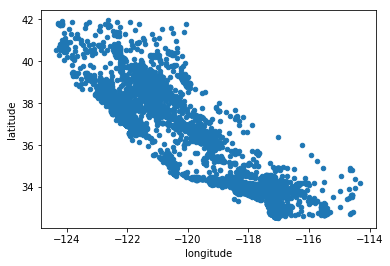

In [47]:
housing_copy.plot(kind='scatter', x='longitude',y='latitude')

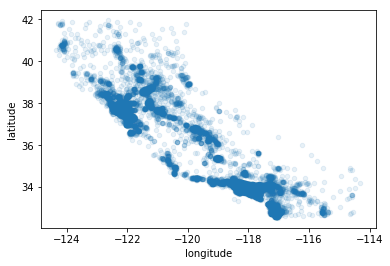

In [59]:
housing_copy.plot(kind="scatter", x='longitude', y='latitude', alpha=0.1)

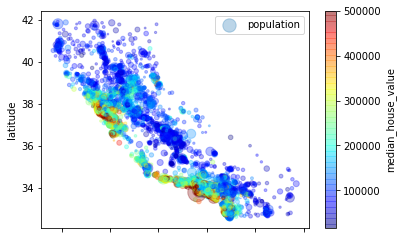

In [77]:
%matplotlib inline
housing_copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3,
s=housing["population"]/100, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

看出房屋价格与位置和人口密度有很大的关系，考虑是不是可以使用聚类算法,来甄选出主要的簇，并且利用新特征来衡量簇中心的接近程度。或许离海的距离也很有用啊


看一下correlation，特征之间的协方差。比如皮尔送相关系数（standard correlation coefficient ），利用corr()函数，越大表示相关性越高


In [81]:
housing = start_train_set.copy()
corr_matrix = housing.corr()

In [82]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

相关系数的取值范围为[-1, 1],当接近1时，表示两者具有强烈的正相关性，比如‘s’和‘c’；当接近-1时，表示有强烈的的负相关性，比如‘s’和‘c’，而若值接近0，则表示相关性很低

          x         y         s         c
x  1.000000  0.941729  0.972598 -0.972598
y  0.941729  1.000000  0.946256 -0.946256
s  0.972598  0.946256  1.000000 -1.000000
c -0.972598 -0.946256 -1.000000  1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A9727B0B8>,
      dtype=object)

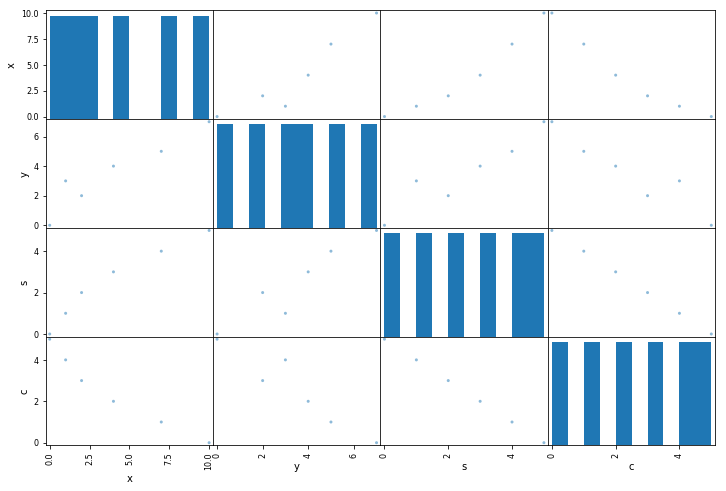

In [83]:
allDf = pd.DataFrame({
    'x':[0,1,2,4,7,10],
    'y':[0,3,2,4,5,7],
    's':[0,1,2,3,4,5],
    'c':[5,4,3,2,1,0]
},index = ['p1','p2','p3','p4','p5','p6'])

# print(allDf) 

corr_matrix = allDf.corr()
print(corr_matrix)

from pandas.plotting import scatter_matrix

scatter_matrix(allDf, figsize=(12, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A955E3358>,
      dtype=object)

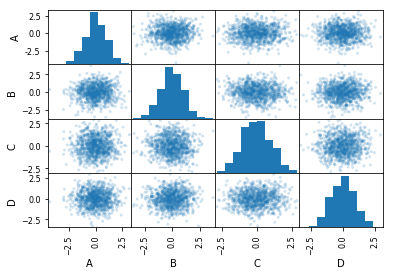

In [86]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['A','B','C','D'])
scatter_matrix(df, alpha=0.2)

E:\work_file\anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A97DD5E80>,
      dtype=object)

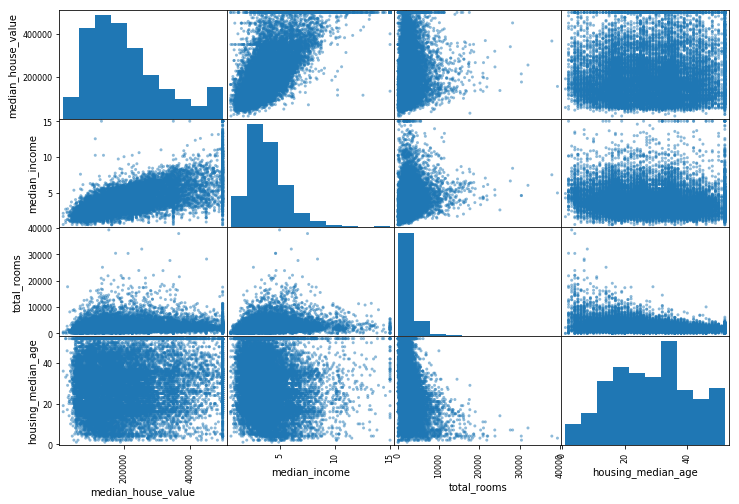

In [87]:
from pandas.tools.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

看一下收入和房价的关系图，有两条水平线分别在350000和500000处，且在350000和500000之间 的相关性不在强烈。

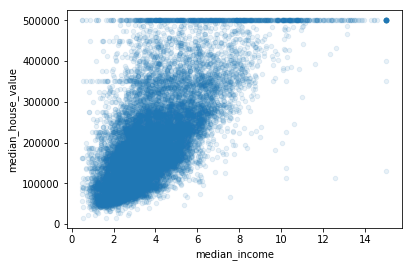

In [88]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

特征值结合形成新的特征值。比如每人拥有的房屋数

In [89]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [90]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

为机器学习算法准备数据

重新拷贝一份start_train_set，并将房价剔除

In [92]:
housing = start_train_set.drop("median_house_value", axis=1)
housing_labels = start_train_set["median_house_value"].copy()

In [93]:
f = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                   columns=list('ABCD'))

In [94]:
f


,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [95]:
f.fillna(method='bfill')

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,3.0,NaN,5
3,NaN,3.0,NaN,4


处理文本和类别属性(handling text and categorical attributes)

In [97]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoder = encoder.fit_transform(housing_cat)
housing_cat_encoder


array([0, 0, 4, ..., 1, 0, 3], dtype=int64)

In [99]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

机器学习算法通常认为两个靠近的值要比两个相缠较大的值更相似，但是 0和4（<1H OCEAN 和NEAR OCEAN ）要比0和1（<1H OCEAN和'INLAND）更相似，为解决这个问题，采用one_hot编码.

In [100]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoder.reshape(-1, 1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [102]:
df = pd.DataFrame([[0, 0, 3], [1, 1, 0], [0, 2, 1],[1, 0, 2]]
                )

In [103]:
df



,0,1,2
0,0,0,3
1,1,1,0
2,0,2,1
3,1,0,2


In [104]:
df_encodered = encoder.fit_transform(df)
df_encodered

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [105]:
df_encodered.toarray()

array([[1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0.]])


使用LabelBinarizer完成上述操作

In [106]:
from sklearn.preprocessing import LabelBinarizer

In [107]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

默认返回密集矩阵，numpy array；在LabelBinarizer中传入sparse_output=True,可以返回稀疏矩阵

In [109]:
housing[:6]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395,INLAND


In [112]:
df = pd.DataFrame({'ocean_proximity':["<1H OCEAN","<1H OCEAN","NEAR OCEAN","INLAND", "<1H OCEAN", "INLAND"],
                  'population': [339.0, 113.0, 462.0, 353.9,1463.9, 570.0]})


In [113]:
df

,ocean_proximity,population
0,<1H OCEAN,339.0
1,<1H OCEAN,113.0
2,NEAR OCEAN,462.0
3,INLAND,353.9
4,<1H OCEAN,1463.9
5,INLAND,570.0


In [116]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_cat = df["ocean_proximity"]
df_cat_encoder = encoder.fit_transform(df_cat)
df_cat_encoder



array([0, 0, 2, 1, 0, 1], dtype=int64)

In [117]:
encoder.classes_


array(['<1H OCEAN', 'INLAND', 'NEAR OCEAN'], dtype=object)

In [118]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
df_cat_1hot = encoder.fit_transform(df_cat_encoder.reshape(-1, 1))
df_cat_1hot

<6x3 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [119]:
df_cat_1hot.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [120]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
df_cat_1hot = encoder.fit_transform(df_cat)
df_cat_1hot

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0]])

In [121]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer(sparse_output=True)
df_cat_1hot = encoder.fit_transform(df_cat)
df_cat_1hot

<6x3 sparse matrix of type '<class 'numpy.int32'>'
	with 6 stored elements in Compressed Sparse Row format>

自定义转换函器：创建一个类，实现fit()[return self]、transform()和fit_transform(),如果使用TransformerMixin作为基类，则自动实现fit_transform()函数，fit_transform() <==> fit().transform(),如果添加BaseEstimator作为基类，,注意此时`__init__`函数不能接受 $*args$ 和 $**kwargs$，还可以使用两个额外的方法（get_params()和set_params()）,这两个函数对于自动超参数调优有用处，下面是个列子，结合两个已经存在的属性。

In [216]:
from sklearn.base import BaseEstimator, TransformerMixin
# xxx_ix 表示第几列
room_ix, bedroom_ix, population_ix, household_ix = 3, 4, 5, 6
housing[:5]
bedroom_ix

4

In [217]:
# transform类实现
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args and **kwargs
        # 是否添加每间屋子拥有卧室数量
        self.add_bedrooms_per_room = add_bedrooms_per_room
        super().__init__()
    
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X, y=None):
        # 每个家庭拥有的房子数量
        rooms_per_household = X[:, room_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedroom_ix] / X[:, room_ix]
            return np.c_[X, rooms_per_household, population_per_household,
bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [218]:
attr_adder = CombinedAttributesAdder()
housing_extra_attribs = attr_adder.transform(housing.values)

In [219]:
pd.DataFrame(housing_extra_attribs[:5])

,0,1,2,3,4,5,6,7,8,9,10,11
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944,0.223852
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796,0.159057
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597,0.241291
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598,0.200866
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785,0.231341


In [129]:
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [130]:
pd.DataFrame(housing_extra_attribs[:5])

,0,1,2,3,4,5,6,7,8,9,10
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


feature scaling  特征缩放

不出意外，当输入数值属性有不同的尺度，比如有的属性变化范围为-1到1而有的属性变化范围为1到1000，机器学习算法通常不会表现的很好，因而需要对数值属性进行尺度压缩。

有两个常用的方法可以使得所有的属性有相同的尺度，
min-max scaling 和 standardization

 min-max scaling（也称为 normalization）：
 $\frac{value - min}{max - min}$ 所有的值在0~1之间，

In [180]:
from sklearn.preprocessing import Imputer
# 1.创建Iimputer
imputer = Imputer(strategy="median")
# 只有一个文本属性，故先去掉
housing_num = housing.drop("ocean_proximity", axis=1)
# 2. 使用fit_transform函数
X = imputer.fit_transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)


In [181]:
housing_tr[:2]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214


In [182]:
housing_tr['ocean_proximity'] = housing["ocean_proximity"]
housing_tr[:2]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,NEAR BAY
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,NEAR BAY


In [192]:
num_attribs = list(housing_num)
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [188]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [234]:
sel = DataFrameSelector(['ocean_proximity' ])
ll = sel.fit_transform(housing)
bb = LabelBinarizer()
bb.fit_transform(ll)

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [250]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_attribs = ['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

cat_attribs = ["ocean_proximity"]
# # 在sklearn 0.19下，由于LabelBinarizer的重写而导致代码失效
# num_pipeline = Pipeline([
#     ('selector', DataFrameSelector(num_attribs)),
#     ('imputer', Imputer(strategy="median")),
#     ('attribs_adder', CombinedAttributesAdder()),
#     ('std_scaler', StandardScaler()),
# ])
# cat_pipeline = Pipeline([
#     ('selector', DataFrameSelector(cat_attribs)),
#     ('label_binarizer', LabelBinarizer()),
# ])
# full_pipeline = FeatureUnion(transformer_list=[
#     ("num_pipeline", num_pipeline),
#     ("cat_pipeline", cat_pipeline),
# ])


    
    

In [251]:
# housing_prepared = full_pipeline.fit_transform(housing)
# num_pipeline_ = num_pipeline.fit_transform(housing)
# num_pipeline_.shape


In [252]:
cat_pipeline =  LabelBinarizer() 
cat_pipeline_ = cat_pipeline.fit_transform(housing[cat_attribs])
# cat_pipeline_

In [253]:
housing_preprocessed = np.concatenate((num_pipeline_, cat_pipeline_), axis=1)
housing[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [269]:
def processed_data(data):
    # 获得数值和文本属性
    num_attribs = num_attribs = ['longitude',
                                'latitude',
                                'housing_median_age',
                                'total_rooms',
                                'total_bedrooms',
                                'population',
                                'households',
                                'median_income']
    
    cat_attribs = ["ocean_proximity"]
    
    # 处理数值属性
    num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
    ])
    
    num_pipeline_ = num_pipeline.fit_transform(data)
    
    # 处理文本和分类属性
    cat_pipeline =  LabelBinarizer() 
    cat_pipeline_ = cat_pipeline.fit_transform(data[cat_attribs])
    # print(num_pipeline_.shape, cat_pipeline_.shape)
    # 用numpy合并
    housing_prepared = np.concatenate((num_pipeline_, cat_pipeline_), axis=1)
    
    return housing_prepared

In [270]:
housing_prepared = processed_data(housing)
housing_prepared.shape

(16512, 16)

 选择和训练模型
 1. 线性回归

In [271]:
#训练线性网络
from sklearn.linear_model import LinearRegression
# housing_labels.shape
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [278]:
some_data = housing_prepared[:5]

some_labels = housing_labels[:5]
# some_data_prepared = processed_data(some_data)
some_data_prepared
print("Predictions: \t", lin_reg.predict(some_data))
print("Labels: \t", list(some_labels))


Predictions: 	 [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: 	 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [279]:
# 使用均方根误差RSME度量模型的误差函数 
from sklearn.metrics import mean_squared_error
housing_predicitions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predicitions)
lin_rsme = np.sqrt(lin_mse)

In [280]:
lin_rsme

68628.19819848923

大多数地区的房价从 120 000美元 到 265 000美元，所以68628美元的误差并不令人满意！！！，典型的差拟合，可能是特征选择的不好，也可能是选取的模型不够好，只能选取一个更好的模型或使用更好的特征来训练算法或者减少模型的约束，由于此模型没有使用正则化约束，所以排除最后一个选项。可以尝试增加更多的特征（比如人口的对数值），但是我们还是先尝试使用更复杂的模型吧。

选用回归决策树模型(DecisionTreeRegressor)，能发现数据中非线性的关系

In [281]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [282]:
housing_predicitions  =tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_predicitions, housing_labels)
tree_mse

0.0

过拟合了……,知道确定使用该模型后，采用使用测试集测试模型。所以需要一部分训练集的数据训练，一部人数据验证模型

cross-validation交叉验证

1. 使用train_test_split函数将训练集分成训练集和验证集，然后再训练集上训练算法，在验证集上验证算法
2. 另一个可选的方法是，使用Scikit-learn的 cross-validation。下面的代码执行的K-fold cross-validation：
随机将数据集分为10个不同的子集，称为folds， 然后在训练和验证决策树模型10次，每一选择一个不同的子集作为验证集，在另外9个子集上训练。
结果是一个包含10个验证分数的数组

In [292]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

TypeError: cross_val_score() got an unexpected keyword argument 'error_score'

In [287]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

# 线性模型
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)



Scores: [69956.73748663 68278.87034359 71691.71250538 68910.9427218
 70811.04179361 74056.26099808 70647.32748805 69596.6973476
 77066.32326528 70168.80213124]
Mean: 71118.47160812514
Standard deviation: 2493.1196349985607
Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.6740017983466


从以上的代码输出看出 决策树模型的验证集上的表现为 71118$\pm$2493 而线性模型的验证集表现为 69052$\pm$2713,可以看出线性模型表现的要比决策树更好，可以得出，决策树模型已严重过拟合。

看一下RandomForestRefressoe的表现吧，简单地说就是无序森林在不同的特征值子集上训练多个
决策树，然后求预测值的平均值。
这种利用其他多个模型来创建新的模型的方法称为集成学习(ensemble learning).

In [290]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

forest_reg.fit(housing_prepared, housing_labels)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)

housing_predicitions  =forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_predicitions, housing_labels)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(lin_rmse_scores)

22056.180234873842
Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.6740017983466


注意效果并不好，并且在训练集的误差要低于验证集上的误差很多，这说明模型仍然存在过拟合问题，
解决方法：
1. 简化模型
2. 增加正则化等约束
3. 增加训练集

当然，应该要尝试更多其他的模型， 支持向量机等，最终确定1到2中潜在的模型

最好将每个试验过的模型保存以便于后面的使用，确保保留了超参数和训练的参数，验证集上的表现分数，甚至预测值。
可以使用pickle或sklearn.externals.joblib,后者在序列化大数组是更高效

In [291]:
from sklearn.externals import joblib
# joblib.dump(my_model, "my_model.pkl")
# # and later...
# my_model_loaded = joblib.load("my_model.pkl")

模型调整， 假设已经找到了一些潜在的模型，下面是几种方法用于模型调整

1. 网格搜索 (grid searh)
一种方法是手动调整超参数(hyperparameters)。
 GridSearchCV,参数为你想调整的超参数和该超参数的值。
 `class sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=None, iid=’warn’, refit=True, cv=’warn’, verbose=0, pre_dispatch=‘2*n_jobs’, error_score=’raise-deprecating’, return_train_score=’warn’)`
 参数：
 * estimator sklearn实现的estimator接口，需要提供score函数，或者有scoring参数
 * param_id: 字典或字典的列表
  [{需要调整的超参数1： 超参数的可能的值}, {{需要调整的超参数2： 超参数的可能的值}}, ], 注意一个字典内为一组超参数的组合方式
  * scoring: 误差函数
  * cv  : 将训练集分为多少个folds
 

属性：

* best_params

* cv_results_

In [293]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)



GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

sklearn 根据param_grid的值，首先会评估$3 \times 4 = 12$种n_estimators和max_features的组合方式，接下来在会在bootstrap=False的情况下（默认该值为True），评估$2 \times3  =6$种12种n_estimators和max_features的组合方式，所以最终会有$12+6=18$种不同的超参数组合方式,
而每一种组合方式要在训练集上训练5次， 所以一共要训练$18 \times 5 = 90$次，当训练结束后，你可以通过best_params_获得最好的组合方式

In [294]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [295]:
# 得到最好的模型
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [296]:
# 获得误差最小的误差值
grid_search.best_score_

-2506429509.22355

如果GridSearchCV初始化时，refit=True（默认的初始化值）,在交叉验证时，一旦发现最好的模型（estimator）,将会在整个训练集上重新训练，这通常是一个好主意，因为使用跟多的数据集会提升模型的性能。

In [299]:
# cv_results_：将结果存在一个字典里, 可以转化为DataFrame类型，每一行为一种超参数组合方式。
cv = pd.DataFrame(grid_search.cv_results_)

E:\work_file\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\work_file\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\work_file\anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\work_file\anaconda\lib\site-packages\sklearn\utils\deprecatio

In [302]:
cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.085940,0.025568,0.004391,0.001827,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.827812e+09,-4.092971e+09,...,-4.139394e+09,1.959892e+08,18,-1.108742e+09,-1.076285e+09,-1.151262e+09,-1.127172e+09,-1.114365e+09,-1.115565e+09,2.449443e+07
1,0.237965,0.021394,0.010079,0.000971,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.742609e+09,-3.333789e+09,...,-3.113304e+09,2.395274e+08,11,-5.701092e+08,-6.094081e+08,-5.785905e+08,-5.931616e+08,-5.756676e+08,-5.853874e+08,1.422342e+07
2,0.767676,0.092776,0.029941,0.004852,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.715244e+09,-2.902911e+09,...,-2.802893e+09,1.542347e+08,8,-4.472685e+08,-4.271909e+08,-4.250249e+08,-4.289724e+08,-4.274656e+08,-4.311845e+08,8.140110e+06
3,0.107399,0.002467,0.003590,0.000482,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.698121e+09,-3.903447e+09,...,-3.666869e+09,2.123558e+08,15,-9.640156e+08,-9.257596e+08,-1.003782e+09,-9.539664e+08,-8.817442e+08,-9.458535e+08,4.065737e+07
4,0.348854,0.003953,0.009683,0.000399,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.721300e+09,-2.868056e+09,...,-2.788953e+09,1.090418e+08,7,-5.299723e+08,-4.985359e+08,-4.892567e+08,-5.204567e+08,-5.260378e+08,-5.128519e+08,1.604050e+07
5,1.058535,0.007244,0.027150,0.000750,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.412966e+09,-2.617706e+09,...,-2.575291e+09,1.220214e+08,3,-4.002692e+08,-3.978664e+08,-3.819384e+08,-4.050417e+08,-3.929495e+08,-3.956131e+08,7.870790e+06
6,0.157606,0.014043,0.003394,0.000200,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.292618e+09,-3.698856e+09,...,-3.535907e+09,1.405519e+08,14,-8.680883e+08,-9.112255e+08,-9.112524e+08,-1.004211e+09,-9.125849e+08,-9.214724e+08,4.468549e+07
7,0.491094,0.019871,0.009585,0.000372,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.553328e+09,-2.791239e+09,...,-2.750653e+09,1.162331e+08,6,-4.944491e+08,-4.779433e+08,-4.857806e+08,-5.040733e+08,-5.053104e+08,-4.935113e+08,1.052407e+07
8,1.446224,0.011595,0.027342,0.000976,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.358673e+09,-2.551963e+09,...,-2.516006e+09,1.406579e+08,2,-3.919785e+08,-3.910130e+08,-3.912702e+08,-3.954620e+08,-3.815968e+08,-3.902641e+08,4.618501e+06
9,0.184060,0.003479,0.003398,0.000202,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.214309e+09,-3.749000e+09,...,-3.492941e+09,2.259341e+08,13,-8.754845e+08,-9.164619e+08,-9.071570e+08,-9.245905e+08,-8.557108e+08,-8.958809e+08,2.609451e+07


In [303]:
for mean_score, params in zip(cv["mean_test_score"], cv["params"]):
    print(np.sqrt(-mean_score), params)

64338.12255034114 {'max_features': 2, 'n_estimators': 3}
55796.98682826028 {'max_features': 2, 'n_estimators': 10}
52942.353620944974 {'max_features': 2, 'n_estimators': 30}
60554.68102018701 {'max_features': 4, 'n_estimators': 3}
52810.54319153441 {'max_features': 4, 'n_estimators': 10}
50747.320348497095 {'max_features': 4, 'n_estimators': 30}
59463.49112391854 {'max_features': 6, 'n_estimators': 3}
52446.67106233131 {'max_features': 6, 'n_estimators': 10}
50159.80848511047 {'max_features': 6, 'n_estimators': 30}
59101.107722861816 {'max_features': 8, 'n_estimators': 3}
51920.13895373909 {'max_features': 8, 'n_estimators': 10}
50064.25380671872 {'max_features': 8, 'n_estimators': 30}
61240.86657596463 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54045.83360004432 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60561.09106204302 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53095.965054469176 {'bootstrap': False, 'max_features': 3, 'n_estimators'

最好的是'max_features': 8, 'n_estimators': 30， 误差为50064，结果要好于默认的超参数，误差为52634

当要探索相对较少的几个超参数组合时，GridSearchCV已经可以了，但当要搜索的空间（比如有很多超参数）很大时，使用RandomizedSearchCV更好。

ensemble methods,另一种调整模型的方法是将表现好的模型组合起来。这将在第7张讲解

In [307]:

print(test_set.shape)
# 在测试集上测试模型
final_model = grid_search.best_estimator_
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()
X_test_prepared = processed_data(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) # => evaluates to 48,209.6
print(final_rmse)

(4128, 10)
65515.11352803989


In [ ]:
# launch, monitor and maintain your system